This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.

# Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

# Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
# Problem 2:
Which factors are important
# Problem 3:
Which algorithms are best for this dataset

In [1]:
#####################Import the packages 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [2]:
####################IMPORT THE DATABASE

columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
train.columns = columns
test.columns = columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
####################Clean the Data

df = pd.concat([train, test], axis=0)
dff=df
k=df

df['Income'] = df['Income'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [4]:
####################REMOVE UNKNOWNS
    
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [5]:
#################### Converting to int

df = pd.concat([df, pd.get_dummies(df['Workclass'],prefix='Workclass',prefix_sep=':')], axis=1)
df.drop('Workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Marital Status'],prefix='Marital Status',prefix_sep=':')], axis=1)
df.drop('Marital Status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Occupation'],prefix='Occupation',prefix_sep=':')], axis=1)
df.drop('Occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Relationship'],prefix='Relationship',prefix_sep=':')], axis=1)
df.drop('Relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Race'],prefix='Race',prefix_sep=':')], axis=1)
df.drop('Race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Sex'],prefix='Sex',prefix_sep=':')], axis=1)
df.drop('Sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['Native country'],prefix='Native country',prefix_sep=':')], axis=1)
df.drop('Native country',axis=1,inplace=True)

df.drop('Education', axis=1,inplace=True)

df.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,...,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


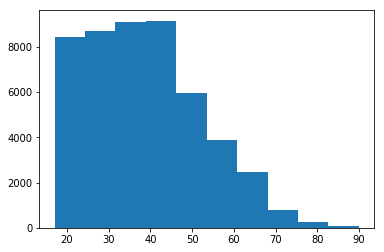

In [6]:
######################## Visualizations #############################
########################################### VISULIZATION ##################################################
###########################################################################################################
###########################################################################################################

plt.hist(dff['Age']);

dff['Income'] = dff['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 0                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: Workclass, dtype: int64

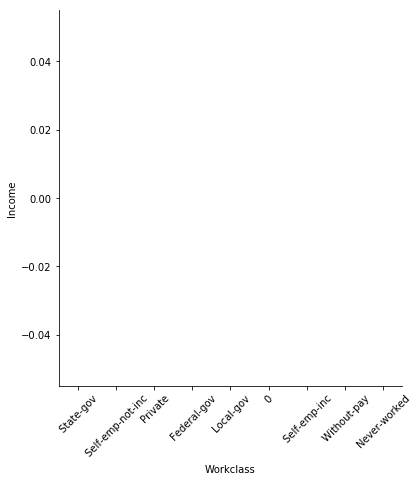

In [7]:
###################################  WORKCLASS
dff.fillna(' 0', inplace=True)
sn.catplot(x="Workclass", y="Income", data=dff, kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=45);
dff['Workclass'].value_counts()



C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


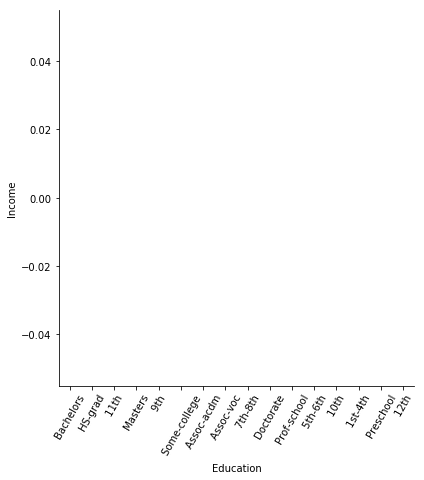

In [8]:
########################################### EDUCATION
sn.catplot(x="Education",y="Income",data=dff,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


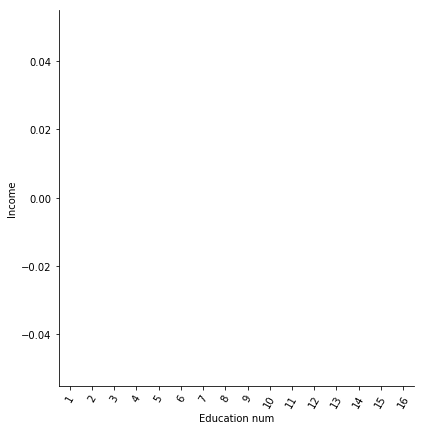

In [9]:
#########################  EDUCATION NO
sn.catplot(x="Education num",y="Income",data=dff,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


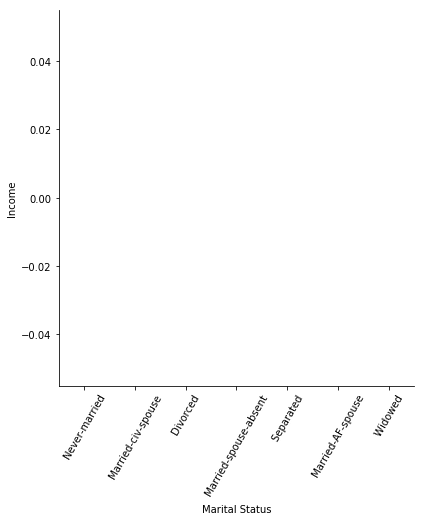

In [10]:
################################ MARITAL status
sn.catplot(x="Marital Status",y="Income",data=dff,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


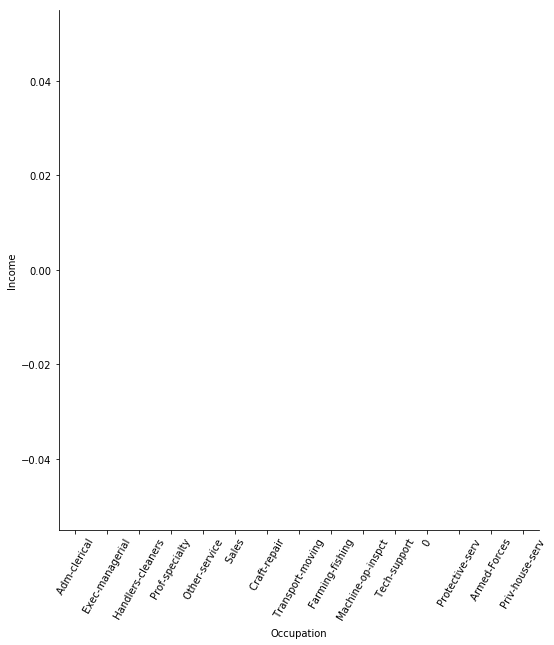

In [11]:
################################ OCCUPATION
sn.catplot(x="Occupation",y="Income",data=dff,kind="bar", height = 8, palette = "muted")
plt.xticks(rotation=60);

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


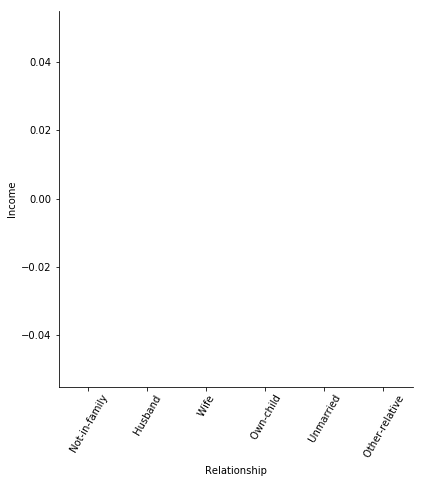

In [12]:
################################ Relationship
sn.catplot(x="Relationship",y="Income",data=dff,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


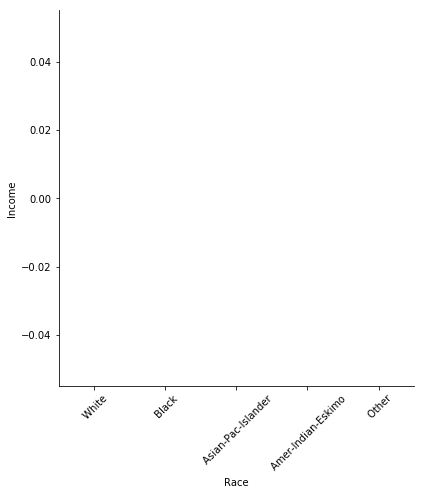

In [13]:
################################ RACE
sn.catplot(x="Race",y="Income",data=dff,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=45);

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


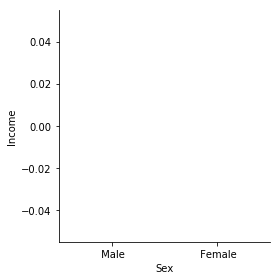

In [14]:
################################ SEX
sn.catplot(x="Sex",y="Income",data=dff,kind="bar", height = 4, palette = "muted");

C:\Jee\Misc\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


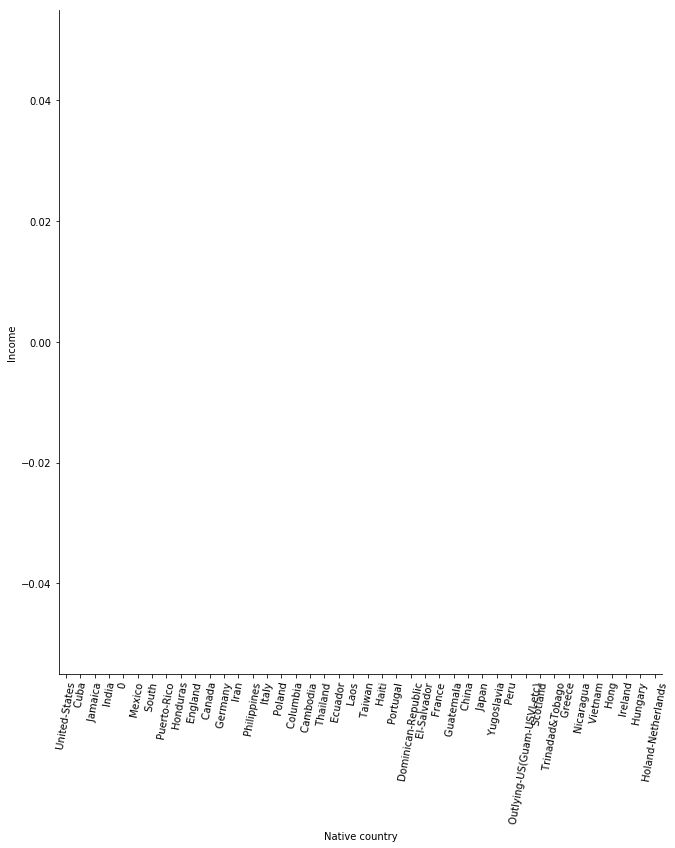

In [15]:
################################     Native county   
sn.catplot(x="Native country",y="Income",data=dff,kind="bar", height = 10, palette = "muted")
plt.xticks(rotation=80);

In [16]:
########### Preparing data for Training and testing 

X = np.array(df.drop(['Income'], 1))
y = np.array(df['Income'])
X = preprocessing.scale(X)
y = np.array(df['Income'])

#Splitting data as train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Jee\Misc\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [17]:
################################CLASSIFICATION##################################################
####################################################################################
#########LOGISTIC REGRESSION######################################################

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

##########Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))


C:\Jee\Misc\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[5471 2745]
 [ 203 1350]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      8216
           1       0.33      0.87      0.48      1553

   micro avg       0.70      0.70      0.70      9769
   macro avg       0.65      0.77      0.63      9769
weighted avg       0.86      0.70      0.74      9769

The Accuracy for Logistic Regression is 0.6982290920257959


In [18]:
################LDA Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


clf = LinearDiscriminantAnalysis()
clf.fit( X_train, y_train )
tree_predict = clf.predict(X_test)
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
LDA = accuracy_score(y_test, tree_predict)
print("The Accuracy for LDA is {}".format(LDA))

[[7486  730]
 [ 806  747]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      8216
           1       0.51      0.48      0.49      1553

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.70      0.70      0.70      9769
weighted avg       0.84      0.84      0.84      9769

The Accuracy for LDA is 0.8427679394001433


C:\Jee\Misc\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [25]:
############################################## KNN ###############

from sklearn import preprocessing, neighbors
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)

##########Results

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

[[7713  503]
 [1041  512]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8216
           1       0.50      0.33      0.40      1553

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.69      0.63      0.65      9769
weighted avg       0.82      0.84      0.83      9769

The Accuracy for KNN is 0.8419490224178524


In [26]:
################################ Decision tree ###########################################

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))


[[8028  188]
 [1198  355]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8216
           1       0.65      0.23      0.34      1553

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.76      0.60      0.63      9769
weighted avg       0.84      0.86      0.83      9769

The Accuracy for Decision Tree Model is 0.8581226328180981


In [27]:
################################ SVM #####################################

from sklearn.svm import SVC
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

svc = SVC(C = 1.0, kernel = "linear" )
svc.fit( X_train, y_train )
svc_predict = svc.predict( X_test )

print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))
SVMA = accuracy_score(y_test, svc_predict)
print("The Accuracy for SVM is {}".format(SVMA))


[[8194   22]
 [1521   32]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      8216
           1       0.59      0.02      0.04      1553

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.72      0.51      0.48      9769
weighted avg       0.80      0.84      0.77      9769

The Accuracy for SVM is 0.8420513870406388


In [28]:
####################### NAIVE  #####################################

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
naive_pre= model.predict(X_test)
print (naive_pre)
##result
print(confusion_matrix(y_test,naive_pre))
print(classification_report(y_test,naive_pre))
NBA = accuracy_score(y_test, naive_pre)
print("The Accuracy for NB is {}".format(NBA))

[1 0 1 ... 1 1 1]
[[2560 5656]
 [  55 1498]]
              precision    recall  f1-score   support

           0       0.98      0.31      0.47      8216
           1       0.21      0.96      0.34      1553

   micro avg       0.42      0.42      0.42      9769
   macro avg       0.59      0.64      0.41      9769
weighted avg       0.86      0.42      0.45      9769

The Accuracy for NB is 0.4153956392670693


In [29]:
####################### neural_network  #####################################

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
NNpre = mlp.predict(X_test)

print(confusion_matrix(y_test,NNpre))
print(classification_report(y_test,NNpre))
NNA = accuracy_score(y_test, NNpre)
print("The Accuracy for Neural Network is {}".format(NNA))

[[7553  663]
 [ 896  657]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      8216
           1       0.50      0.42      0.46      1553

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.70      0.67      0.68      9769
weighted avg       0.83      0.84      0.84      9769

The Accuracy for Neural Network is 0.8404135530760569


C:\Jee\Misc\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
########################### KMEANS ###################################

from sklearn import cluster
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X_train) 
labels = k_means.labels_
centroids  = k_means.cluster_centers_.squeeze()
labelspre = k_means.predict(X_test)
print(confusion_matrix(y_test,labelspre))
print(classification_report(y_test,labelspre))
KmeanA = accuracy_score(y_test, labelspre)
print("The Accuracy for kmeans is {}".format(KmeanA))

[[5443 2773]
 [ 380 1173]]
              precision    recall  f1-score   support

           0       0.93      0.66      0.78      8216
           1       0.30      0.76      0.43      1553

   micro avg       0.68      0.68      0.68      9769
   macro avg       0.62      0.71      0.60      9769
weighted avg       0.83      0.68      0.72      9769

The Accuracy for kmeans is 0.677244344354591


In [31]:
#######################XGB experiementing with learning rate
#This code is to let algorithm figure out itself, which value for learning rate is best 

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.294507 using {'learning_rate': 0.3}
-0.687364 (0.000032) with: {'learning_rate': 0.0001}
-0.640067 (0.000297) with: {'learning_rate': 0.001}
-0.413631 (0.001974) with: {'learning_rate': 0.01}
-0.299629 (0.003141) with: {'learning_rate': 0.1}
-0.296462 (0.002723) with: {'learning_rate': 0.2}
-0.294507 (0.002896) with: {'learning_rate': 0.3}


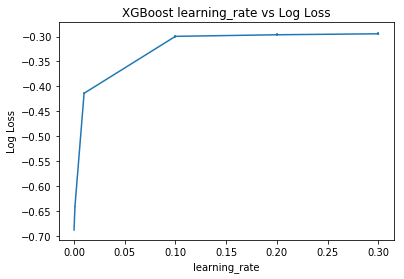

In [32]:
from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

In [33]:
############## This xgboost code is where I experiment which learning rate and what number of estimators are BEST

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy
from matplotlib import pyplot
from pandas import read_csv
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.292964 using {'learning_rate': 0.2, 'n_estimators': 300}
-0.687364 (0.000032) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.681695 (0.000063) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.676137 (0.000093) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.670686 (0.000124) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.665340 (0.000154) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.640067 (0.000297) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.596035 (0.000552) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.559145 (0.000778) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.527905 (0.000986) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.501249 (0.001187) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.413631 (0.001974) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.344243 (0.002940) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.321845 (0.003171) with: {'learning_rate': 0.01, 'n_e

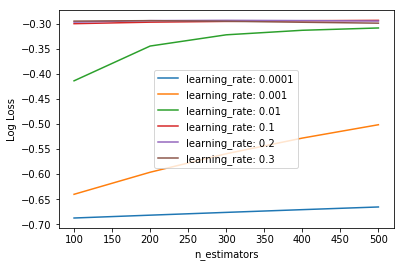

In [34]:
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

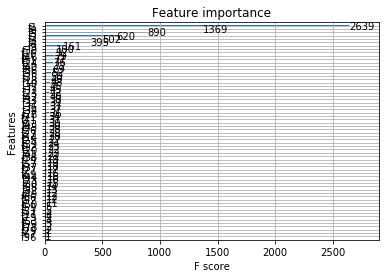

training set auc: 0.8646739686764254
test set auc: 0.8646739686764254
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}
The Accuracy  is 0.8646739686764254


In [35]:
############# XGboost - Picking the best values for learning rate and estimators  

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))